<h1><center>
 Detección de fraude en pagos online
</center></h1>

## Introducción

<p style='text-align: justify;'>
El fraude en plataformas de pagos, es una problemática mundial que representa
pérdidas económicas a gran escala. MercadoPago, por su dimensión y presencia
regional, es blanco de este tipo de ataques diariamente. Construir modelos de
machine learning para prevención de fraude robustos y escalables que analicen todo
el ﬂujo de pagos es indispensable para la seguridad de nuestros usuarios.
    
La detección y prevención de fraudes son servicios esenciales que utilizan inteligencia artificial (AI) y Machine Learning (ML) para identificar posibles instancias de fraude antes de que ocurran.

En sus inicios, la detección y prevención de fraudes se enfocaba en examinar datos históricos y los expertos buscaban manualmente capas de registros para detectar comportamientos fraudulentos. Pero, en un mundo que en gran parte funciona en línea, la detección y prevención del fraude se ha convertido en detener el fraude al instante y evitar que suceda. Hoy en día, las soluciones de gestión de fraudes están automatizadas y detectan patrones inusuales de actividad, señalando comportamientos potencialmente fraudulentos y evitando que se complete una transacción.[TIBCO](https://www.tibco.com/es/reference-center/what-is-fraud-detection#:~:text=%C2%BFQu%C3%A9%20es%20la%20detecci%C3%B3n%20de%20fraude%3F%20La%20detecci%C3%B3n,posibles%20instancias%20de%20fraude%20antes%20de%20que%20ocurran.)    
    
para poder  realizar contro de  fraude  sobre las  transacciones registradas en la plataforma tiempo real, se  realiza proceso de  analitica avanzada con ML que permita identificar en streaming la caracteristica de cada transaccion; para ello, se ha recolectado informacion historica de la plataforma que contiene 20 campos  que describe el comportamiento de las caracteristicas de la operacion y un campo objetivo para la clasificacion de si se presento o no un fraude.
    
    
</p>


### Prerequisitos

Para este  notebook se necesita installar las  siguientes  dependencias:

- `os`
- `python == 3.9.15`
- `numpy == 1.24.1`
- `scipy == 1.10.0`
- `matplotlib == 3.5.2`
- `scikit-learn == 1.1.2`
- `joblib == 1.2.0`
- `Pillow == 9.4.0`
- `pandas == 1.5.2`
- `seaborn == 0.12.2`
- `imbalanced-learn==0.10.1`

En el sigueinte enlace [github](https://github.com/diosimar/deteccion-de-fraude.git) se encontrara todos los archivos correspondientes al estudio. Se tiene la siguiente estructura:

 * Folder llamado Data, donde se encuentra el archivo inicial para analizar y archivos CSV con la data procesada y limpiada.
 * Utils, capetra de modulo python, en donde  se encuentra el archivo functions.py donde  se puede evidenciar las funciones construidas para procesar los datos.
 * Notebook llamado EDA, en donde se presenta analisis descriptivo previo sobre la calidad de la data.
 * Archivo preprocessing.py  en donde se realiza todo el proceso de ingenieria de caracteristicas.
 * Archivo trainning.py en donde  se realiza el entreno, tunning y seleccion del mejor modelo ajustado para determinar la deteccion de  fraude en transacciones de la plataforma.


In [1]:
# cargue de  librerias y modulos requeridos 
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Análisis y transformaciones del dataset
<p style='text-align: justify;'>
Una vez cargado el conjunto de  datos, se realiza un analisis exploratorio de datos, el cual permite observar valores faltantes en los campos K y C, implicando asi la eliminacion del campo K debido a que presenta un 76 % aproximadamentes de informacion no registrada y en el campo K se realiza imputacion de datos. Adicionalmente, se observan valores negativos no congruentes en los campos B y S;los cuales son eliminados y se realiza control de outlier. una vez  analizada la variable objetivo se observo un desbalance en las clases de interes - fraude Vs no fraude - por tal razon, se utiliza metodos de balanceo basados en procesos aleatorio de  data aumentations (SMOTE), para asi poder tener rempresantabilidad en las clasificaciones. Para vizualizar el proceso se puede dirigir al siguiente enlace:
 
[github](https://github.com/diosimar/deteccion-de-fraude.git)    
</p>

In [2]:
####______carga de informacion procesada testing dataset_______####
data_test= pd.read_csv("Data/testSet.csv")

xtest = data_test[data_test.columns[:-1]]
ytest = data_test.Fraude

In [7]:
# cargue del modelo pre entrenado para clasificacion binaria
import os
import joblib
model_path = 'output/finalized_model.pkl' 

estimator = joblib.load('output/finalized_model.pkl' ) # Carga del modelo.

## Modelos utilizados

En el proceso de ajuste de modelo, se considero 4 modelos de ML para clasificacion, los cuales fueron:

 * DecisionTreeClassifier(),
 * RandomForestClassifier(),
 * GradientBoostingClassifier(),
 * SGDClassifier()
 
Se realiza entrenamiento de cada modelo por medio de un pipeline de procesos ejecutables, en donde  se calculan las metricas para determinar cuales son los modelos ajustados con un accuracy mayor de 70 %.´una vez identificado los modelos que cumplan la condicion expuesta se procede a realizar un encuadrillado para la optimizacion de hiperparametros del modelo en el entrenamiento. A partir de este analisis, se observo que los modelos mas eficientes son RandomForestClassifier con un 74.91% de accuracy y el GradientBoostingClassifier con un accuracy asociado del 75.18% ( siendo el mejor se determina almacenar el modelo entrenado en un archivo pkl para poder utilizarlo con las predicciones de la presencia de fraude - despliegue de modelo-)

In [9]:
# score o eficiencia total del modelo de clasificacion GradientBoostingClassifier 
acc_score = estimator.score(xtest, ytest)
acc_score

0.7518796992481203

## Evaluacion

In [16]:
# calculo de "precision" y "recall" por cada clasificacion realizada por el modelo GradientBoostingClassifier 
y_pred = estimator.predict(xtest)
precision_test = precision_score(ytest, y_pred)
recall_test = recall_score(ytest, y_pred)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print( 'Precision: ', precision_test, '\n', 'Recall: ', recall_test,'\n', 'F1-score:', f1_test )
print('------------------ summary--------------------')    
#target_names = [le_name_mapping[x] for x in le_name_mapping]
print(classification_report(ytest, y_pred))

Precision:  0.5427631578947368 
 Recall:  0.5481727574750831 
 F1-score: 0.5454545454545455
------------------ summary--------------------
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2422
           1       0.54      0.55      0.55       903

    accuracy                           0.75      3325
   macro avg       0.69      0.69      0.69      3325
weighted avg       0.75      0.75      0.75      3325



Observando la tabla del reporte de clasificacion, se identifica que el modelo tiene dificultad( prediccion moderadamente aceptable) en predecir los valores asociados a la clase (1), esto debido al balanceo presente en el conjunto de datos de test ( se recomienda aumentar las mediciones para poder obtener resultados mas certeros)  por otro lado, se observa que  las metricas de clasificacion por grupos correspondiente a  cero, son abuenas

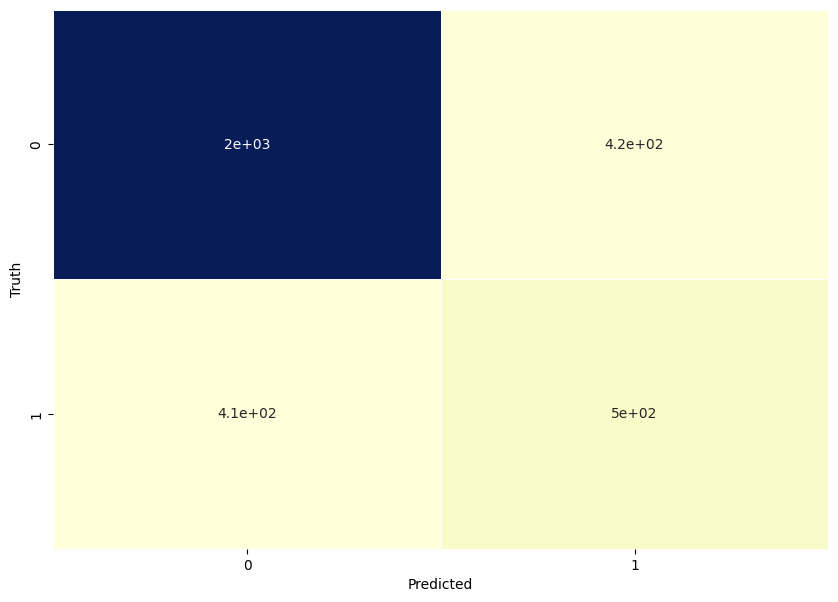

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report, roc_curve

cm = confusion_matrix(ytest, y_pred)
# after creating the confusion matrix, for better understaning plot the cm.
#import seaborn as sn
plt.figure(figsize = (10,7))
sns.heatmap(cm, linewidths = .5,annot=True, cbar = False, cmap = 'YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [15]:
cm

array([[2005,  417],
       [ 408,  495]], dtype=int64)

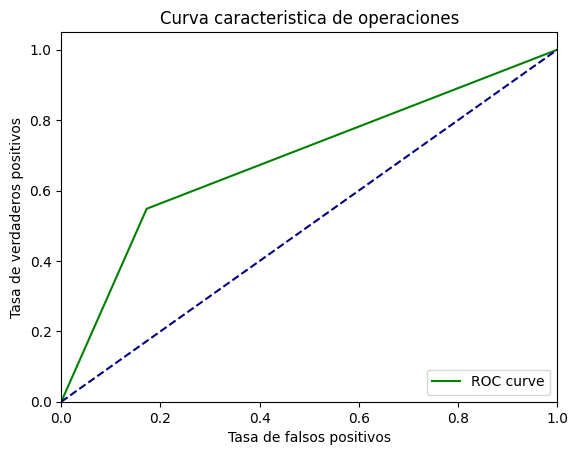

In [17]:
# curva caracteristica de  operaciones (ROC) para identificar la precision de la clasificacion realizada por el modelo de red nueronal
fpr, tpr, thresholds = roc_curve(ytest, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='green',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva caracteristica de operaciones')
plt.legend(loc="lower right")
plt.show()

In [20]:
#calculo del indice  area bajo la curva roc (AUC)
from sklearn import metrics
metrics.auc(fpr, tpr)

0.688000499299061

Se observa que la curva roc tiende al borde superior, espresando que el modelo tiene un comportamiento aceptable, para poder mejorar sus metricas, ya que el AUC es del 68 % aproximadamente; se debe realizar metodos de data aumentation para la mejora de la calidad del dato en el conjunto de test. por otro lado, la matriz de confucion evidencia el comportamiento mediano para detectar las clases de  fraude = 1, debido a la poca representacion que se tiene en el conjunto de datos.

## Conclusion 

a pesar de que se tiene un accuracy aceptable en el modelo GradientBoostingClassifier, siendo del 75 %, y sus metricas tendiendo a  una mejora una vez realizado el tunning del entrenamiento,  se  recomienda ajustar los valores posibles de  los parametros para optimizar mejor al modelo. Adicionalmente, se  recomienda  realizar ajuste de balanceo de datos  por medio de bootstraping o apartir de redes neuronales generativas antagonicas GANGenerator, para asi mejorar el performance de la data de entreno y test. finalmente,  recomenzamos  utilizar una red nueronal convulusional de clasificacion por medio de una funcion de enlace ReLU para asi poder ajustar mejor los datos para la deteccion de fraude en las transacciones del portal web.